## CAMB-iDEDM Demo
In this notebook, I show briefly how to use the CAMB-iDEDM Python interface

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
from matplotlib import pyplot as plt
import numpy as np

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# Make sure the version and path is what you expect

Using CAMB 1.3.8 installed at /home/user/cosmo/CAMB-iDEDM/camb


/tmp/ipykernel_23806/747188046.py:29: RuntimeWarning: invalid value encountered in divide
  axs[0].semilogx(ells, c_ells_ppf[:,0]/c_ells_no_ppf[:,0] - 1)


Text(0, 0.5, '$C^{TT}_\\ell$')

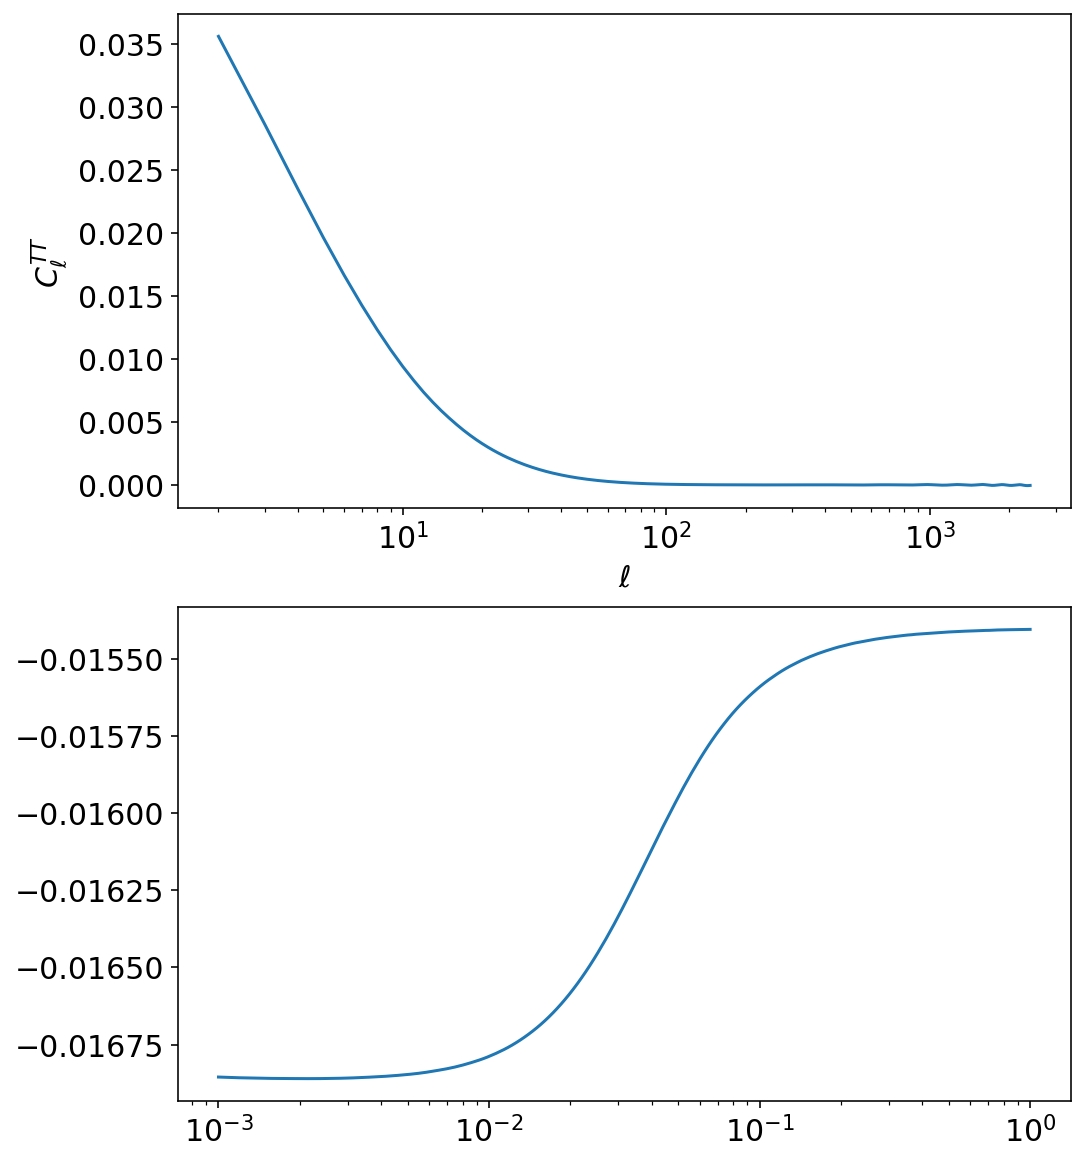

In [4]:
# Testing PPF
xi = -0.3
fig, axs = plt.subplots(2, 1, figsize=(8,10))
plt.rcParams.update({'font.size': 15})

# Calculate spectra for no PPF
pars = camb.CAMBparams()
pars.set_cosmology(thetastar=0.0104, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.DarkEnergy.set_params(xi_interaction=xi, w=-0.9999, use_ppf_interaction=False)
pars.set_matter_power(redshifts=[0], kmax=2.0)
results = camb.get_results(pars)

cmb_spectra = results.get_cmb_power_spectra(pars, CMB_unit='muK')
ks, z, pk_no_ppf = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
c_ells_no_ppf = cmb_spectra['total']
ells = np.arange(c_ells_no_ppf.shape[0])

# Recalculate spectra with PPF
pars = camb.CAMBparams()
pars.set_cosmology(thetastar=0.0104, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.DarkEnergy.set_params(xi_interaction=xi, w=-0.9999, use_ppf_interaction=True)
pars.set_matter_power(redshifts=[0], kmax=2.0)
results = camb.get_results(pars)

cmb_spectra = results.get_cmb_power_spectra(pars, CMB_unit='muK')
ks, z, pk_ppf = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
c_ells_ppf = cmb_spectra['total']

axs[0].semilogx(ells, c_ells_ppf[:,0]/c_ells_no_ppf[:,0] - 1)
axs[1].semilogx(ks, pk_ppf[0]/pk_no_ppf[0] - 1)

axs[0].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$C^{TT}_\ell$')

Text(0, 0.5, '$C^{TT}_\\ell$')

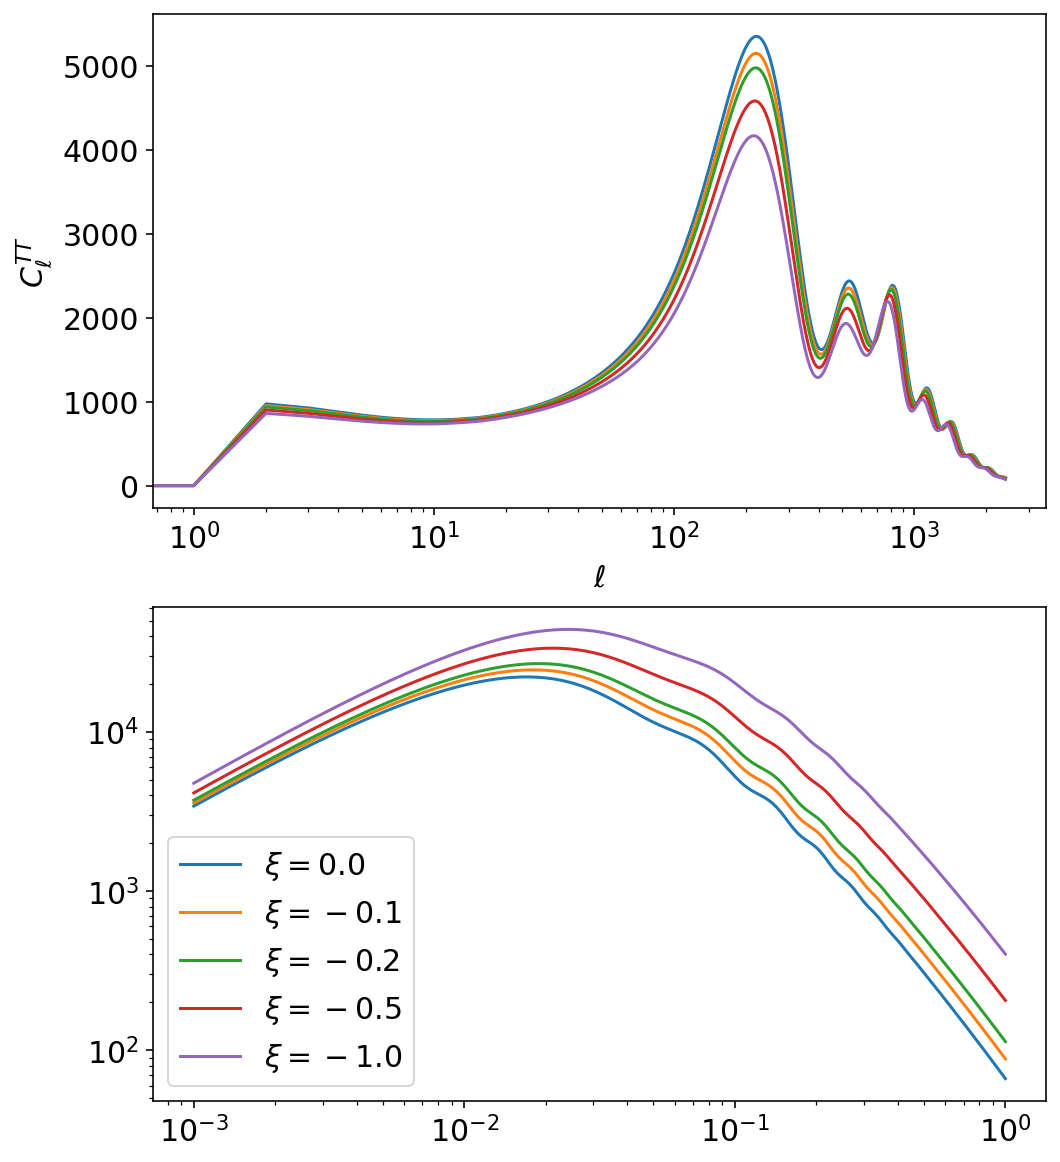

In [2]:
xis = [0, -0.1, -0.2, -0.5, -1]

plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(2, 1, figsize=(8,10))
for xi in xis:
    pars = camb.CAMBparams()
    pars.set_cosmology(thetastar=0.0104, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
    pars.DarkEnergy.set_params(xi_interaction=xi, w=-0.999)
    pars.set_matter_power(redshifts=[0], kmax=2.0)
    results = camb.get_results(pars)

    cmb_spectra = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    ks, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
    c_ells = cmb_spectra['total']
    ells = np.arange(c_ells.shape[0])
    axs[0].semilogx(ells, c_ells[:,0])
    axs[1].loglog(ks, pk[0])

plt.legend([r'$\xi = {:.1f}$'.format(xi) for xi in xis])
axs[0].set_xlabel(r'$\ell$')
axs[0].set_ylabel(r'$C^{TT}_\ell$')
# plt.savefig("iDEDM_Power_Spectra.pdf")

In [4]:
# Does PPF actually work?
xi = -0.5
w  = -1.1
pars = camb.CAMBparams()
pars.set_cosmology(thetastar=0.0104, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.DarkEnergy.set_params(xi_interaction=xi, w=w, use_ppf_interaction=True)
pars.set_matter_power(redshifts=[0], kmax=2.0)
results = camb.get_results(pars)